> **Importing the libraries**

In [1]:


import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


Using TensorFlow backend.


In [2]:
df = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [3]:
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
dataset = df.iloc[:,1:40]
dataset.head(5)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# EDA ** **

In [5]:
corr = dataset.corr('pearson')

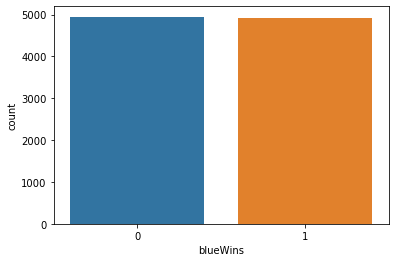

In [6]:
sns.countplot(data = dataset,x='blueWins')

In [7]:
dataset.isnull().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

In [8]:
blue_df = dataset.iloc[:,0:19]
blue_df.drop(columns = ['blueDeaths'],inplace = True)
blue_df.head(5)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin
0,0,28,2,1,9,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5
1,0,12,1,0,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4
2,0,15,0,0,7,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6
3,0,43,1,0,4,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1
4,0,75,4,0,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0


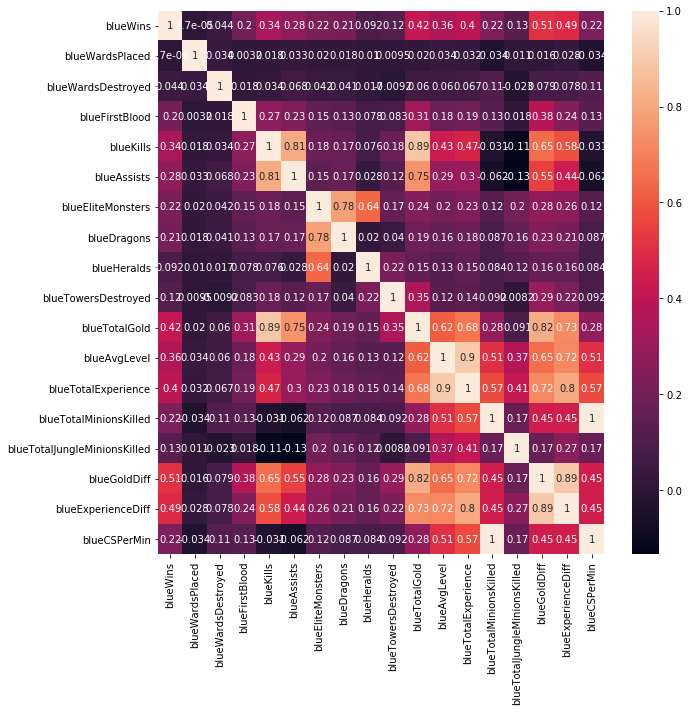

In [9]:
corr = blue_df.corr('pearson')
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True)

- Since `blueDeaths` is having negative correlation with the blueWins, we drop the attribute. 
- Along with the other Red Team attributes

In [10]:
corr['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
blueAssists                     0.276685
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
Name: blueWins, dtype: float64

**Let us attempt to tackle it using deep learning**

In [11]:
X = blue_df.iloc[:,1:]
y = blue_df.iloc[:,1]

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X),columns=X.columns)
X.head(5)

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin
0,0.316996,-0.379275,0.990429,0.935301,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,-1.465951,0.256228,0.013342,-0.992782
1,-0.570992,-0.839069,-1.009663,-0.393216,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,-0.758722,-1.191254,-0.593342,-1.953558
2,-0.404494,-1.298863,-1.009663,0.271042,-0.650812,0.719503,1.327623,-0.481132,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,-0.455624,-0.483614,-0.520436,-1.404543
3,1.149484,-0.839069,-1.009663,-0.725346,-0.404768,0.719503,-0.753226,2.078430,-0.210439,-0.876959,0.275280,0.021567,-0.718275,0.453671,-0.544350,0.013863,-0.718275
4,2.925460,0.540312,-1.009663,-0.061087,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,-0.067382,0.275280,0.512211,-0.306513,0.655736,-0.415133,0.137283,-0.306513


In [13]:
y = blue_df['blueWins']
y = to_categorical(y, 2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=0)

In [15]:
model = Sequential()
model.add(Dense(units=18,activation='relu',input_dim=len(X.columns)))
model.add(Dense(36,activation = 'relu'))
model.add(Dense(72,activation = 'relu'))
model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                324       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                684       
_________________________________________________________________
dense_3 (Dense)              (None, 72)                2664      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 146       
Total params: 3,818
Trainable params: 3,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,
                   epochs=50,
                   validation_data=(X_test,y_test))

Train on 7903 samples, validate on 1976 samples
Epoch 1/50
7903/7903 [==============================] - 1s 78us/step - loss: 0.5689 - accuracy: 0.6963 - val_loss: 0.5482 - val_accuracy: 0.7161
Epoch 2/50
7903/7903 [==============================] - 0s 43us/step - loss: 0.5348 - accuracy: 0.7271 - val_loss: 0.5444 - val_accuracy: 0.7156
Epoch 3/50
7903/7903 [==============================] - 0s 43us/step - loss: 0.5298 - accuracy: 0.7317 - val_loss: 0.5450 - val_accuracy: 0.7146
Epoch 4/50
7903/7903 [==============================] - 0s 44us/step - loss: 0.5258 - accuracy: 0.7358 - val_loss: 0.5451 - val_accuracy: 0.7166
Epoch 5/50
7903/7903 [==============================] - 0s 43us/step - loss: 0.5243 - accuracy: 0.7344 - val_loss: 0.5483 - val_accuracy: 0.7131
Epoch 6/50
7903/7903 [==============================] - 0s 44us/step - loss: 0.5213 - accuracy: 0.7374 - val_loss: 0.5513 - val_accuracy: 0.7110
Epoch 7/50
7903/7903 [==============================] - 0s 43us/step - loss: 0.520

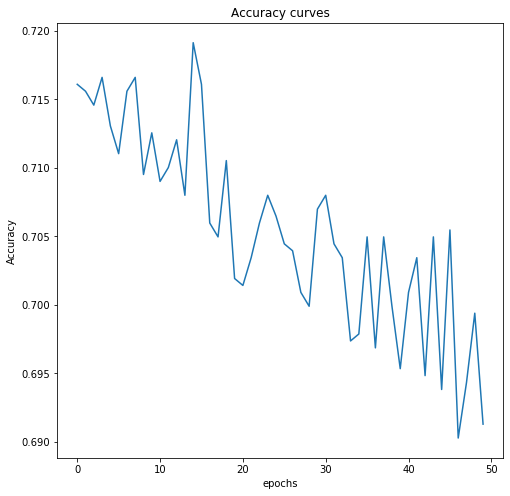

In [18]:
plt.figure(figsize=(8,8))
plt.plot(history.history['val_accuracy'])
#plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy curves')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()